In [0]:
!pip install ffmpeg-python

In [0]:
!pip install music21

In [0]:
!pip install PyWavelets

# 1. FFT em ondas criadas no próprio programa

## 1.1. Programa para a geração de ondas

Primeiramente, testaremos a transformada rápida de Fourier em ondas geradas dentro do próprio programa (x1 e x2). Os sinais criados têm frequências de 440Hz e 220Hz e correspondem, respectivamente, às notas A4 (Lá na oitava do Dó Central) e A3 (Lá uma oitava abaixo do Dó Central).



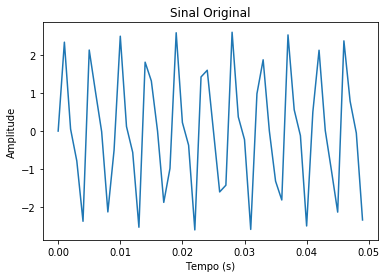

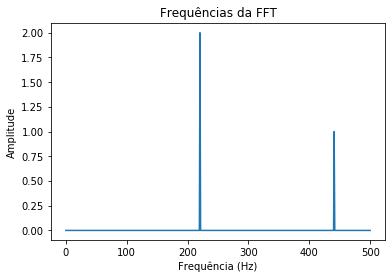

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

# retirado do seguinte tutorial: https://www.youtube.com/watch?v=UjUKaQKniLM

Fs = 1000 # Número de amostras por segundo
t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)

f1 = 440 # frequencia (em Hz)
f2 = 220

x1 = np.sin(2.0*np.pi*f1*t) # criando uma senoide
x2 = 2*np.sin(2.0*np.pi*f2*t) # outra senoide com uma frequência diferente e o dobro da amplitude

x = x1 + x2 # somando as duas ondas

# Gráfico 1: sinal original (uma janela de visualização adequada)
plt.figure(1)
plt.title("Sinal Original")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.plot(t[0:50], x[0:50])

# gerando o eixo das frequências
n = np.size(t)
fr = (Fs/2)*np.linspace(0, 1, n/2)

# Aplicando a FFT
X = fft(x)
X_m = (2/n)*np.abs(X[0:np.size(fr)]) # normalizando o resultado

# Gráfico 2: frequência(s) encontrada(s)
plt.figure(2)
plt.title("Frequências da FFT")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(fr, X_m)

## 1.2. Resultados

Abaixo, definimos funções para encontrar os picos de amplitude no gráfico a partir de um valor mínimo, definido, no caso, como 0.5. Depois de acharmos os picos, imprimimos o resultado de quais notas foram identificadas nos sinais analisados.

A nota cantada foi A3
A nota cantada foi A4


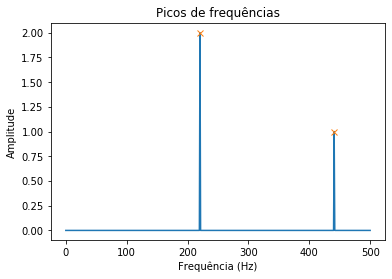

In [0]:
from music21 import *

def find_peaks(X_m, fr, min_diff):
  peaks = []
  avr = max(X_m)/2

  for index in range(X_m.size - 2):
    window = [X_m[index], X_m[index+1], X_m[index+2]]
    difference1 = window[1] - window[0]
    difference2 = window[1] - window[2]
    if((difference1 > min_diff and difference2 > min_diff) or window[1] >= avr):
      peaks.append(fr[index+1])
      
  return peaks

def find_peaks_Index(X_m, fr, min_diff):
  peaksInd = []
  avr = max(X_m)/2
  
  for index in range(X_m.size - 2):
    window = [X_m[index], X_m[index+1], X_m[index+2]]
    difference1 = window[1] - window[0]
    difference2 = window[1] - window[2]
    if((difference1 > min_diff and difference2 > min_diff) or window[1] >= avr):
      peaksInd.append(index+1)
      
  return peaksInd


peaks = find_peaks(X_m, fr, 0.5)
peaksInd = find_peaks_Index(X_m, fr, 0.5)

plt.figure(1)
plt.title("Picos de frequências")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(fr, X_m)
plt.plot(fr[peaksInd], X_m[peaksInd], "x")

for i in range(len(peaks)):
  nota = pitch.Pitch()
  nota.frequency = peaks[i].astype(int)
  if(i == 0 or peaks[i] != peaks[i-1]):
    print("A nota cantada foi", nota.nameWithOctave)

## 1.3. Generalização do processo e criação de uma função

Para que o processo, que será utilizado repetidas vezes, fique simplificado e generalizado, reescrevemos o código em apenas uma função, que recebe o áudio do usuário e plota o sinal original, o sinal da FFT com os picos e informa quais notas foram cantadas.

In [0]:
def fft_notes(audio):
  Fs = len(audio) # Número de amostras por segundo
  t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)

  # Gráfico 1: sinal original (uma janela de visualização adequada)
  plt.figure(1)
  plt.title("Sinal Original")
  plt.xlabel("Tempo (s)")
  plt.ylabel("Amplitude")
  plt.plot(t, audio)

  # gerando o eixo das frequências
  n = np.size(t)
  fr = (Fs/2)*np.linspace(0, 1, n/2)

  # Aplicando a FFT
  X = fft(audio)
  X_m = (2/n)*np.abs(X[0:np.size(fr)]) # normalizando o resultado

  # Gráfico 2: frequência(s) encontrada(s)
  plt.figure(2)
  plt.title("Frequências da FFT")
  plt.xlabel("Frequência (Hz)")
  plt.ylabel("Amplitude")
  plt.plot(fr, X_m)

  peaks = find_peaks(X_m, fr, 50)
  peaksInd = find_peaks_Index(X_m, fr, 50)

  plt.figure(3)
  plt.title("Picos de frequências")
  plt.xlabel("Frequência (Hz)")
  plt.ylabel("Amplitude")
  plt.plot(fr, X_m)
  plt.plot(fr[peaksInd], X_m[peaksInd], "x")
  
  for i in range(len(peaks)):
    nota = pitch.Pitch()
    nota.frequency = peaks[i].astype(int)
    if(i != 0):
      notaAntes = pitch.Pitch()
      notaAntes.frequency = peaks[i-1].astype(int)
      if(notaAntes.nameWithOctave != nota.nameWithOctave):
        print("A nota cantada foi", nota.nameWithOctave)
    else:
      print("A nota cantada foi", nota.nameWithOctave)

In [0]:
def fft_only_notes(audio):
  notas = []
  
  Fs = len(audio) # Número de amostras por segundo
  t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)
  
  # gerando o eixo das frequências
  n = np.size(t)
  fr = (Fs/2)*np.linspace(0, 1, n/2)

  # Aplicando a FFT
  X = fft(audio)
  X_m = (2/n)*np.abs(X[0:np.size(fr)]) # normalizando o resultado

  peaks = find_peaks(X_m, fr, 50)
  peaksInd = find_peaks_Index(X_m, fr, 50)
  
  for i in range(len(peaks)):
    nota = pitch.Pitch()
    nota.frequency = peaks[i].astype(int)
    if(i != 0):
      notaAntes = pitch.Pitch()
      notaAntes.frequency = peaks[i-1].astype(int)
      if(notaAntes.nameWithOctave != nota.nameWithOctave):
        notas.append(nota.nameWithOctave)
    else:
      notas.append(nota.nameWithOctave)
    
    return notas

# 2. FFT no áudio gravado pelo usuário

## 2.1. Captação do áudio pelo browser

Agora que já testamos a FFT num arquivo do computador, conseguiremos aplicar a FFT em áudios que captaremos pelo próprio browser, da seguinte maneira:

In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
from scipy.io.wavfile import read as wav_read
import ffmpeg
import io

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... please, wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

Assim, podemos captar o áudio do usuário. Cante alguma coisa!

In [0]:
audio, sr = get_audio()

## 2.2. Plotando o áudio captado

Abaixo, plotamos como o áudio que você ofereceu se parece:

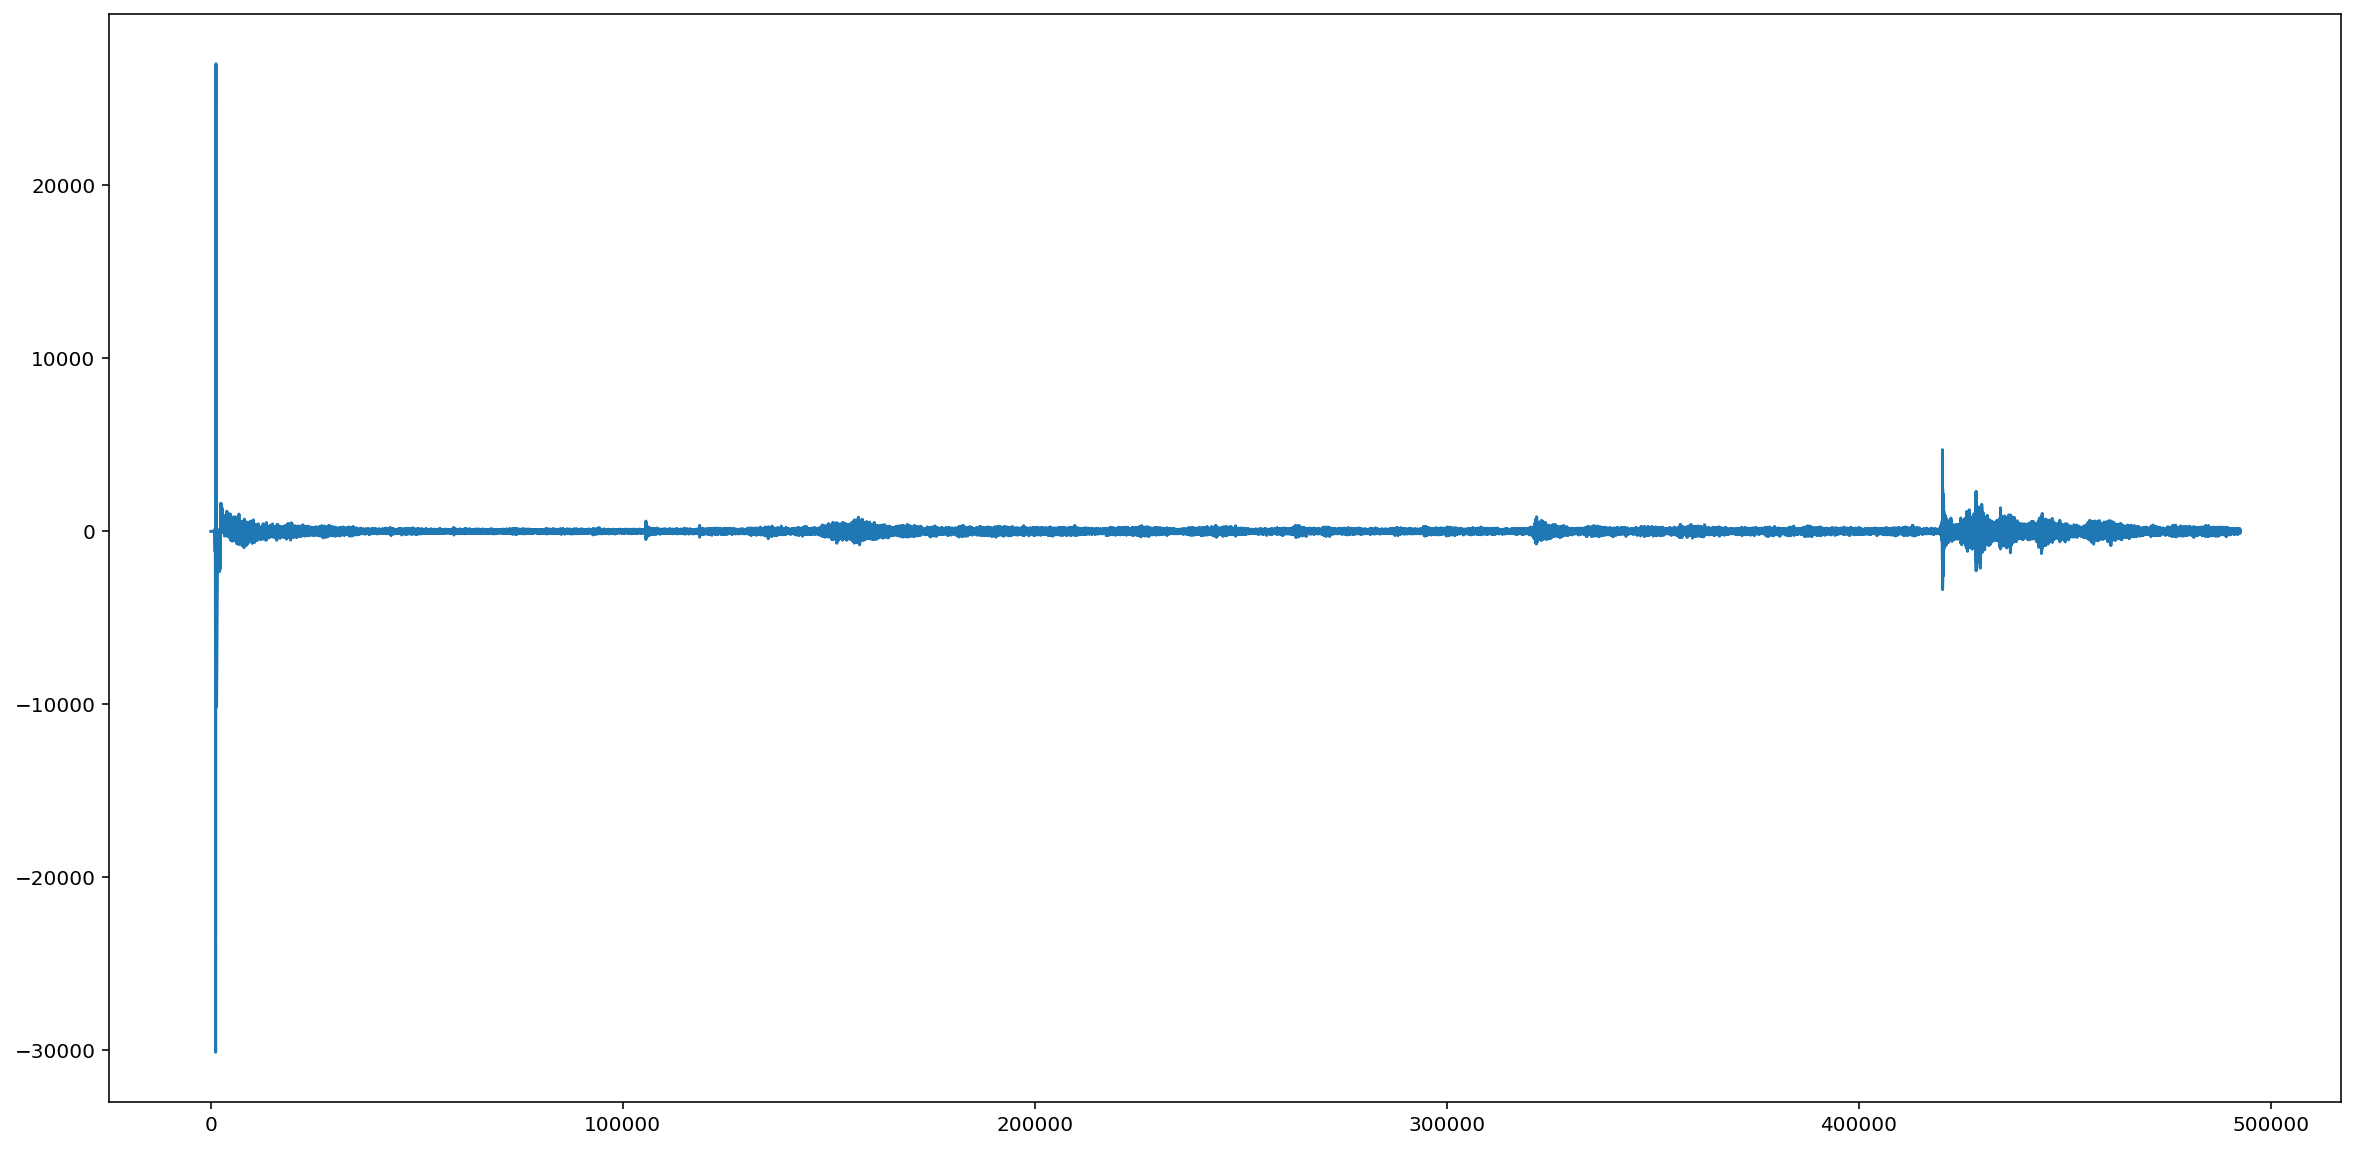

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

## 2.3. Aplicando a FFT no áudio do usuário

Agora, aplicaremos a mesma técnica da FFT no áudio que você acabou de providenciar.

ValueError: ignored

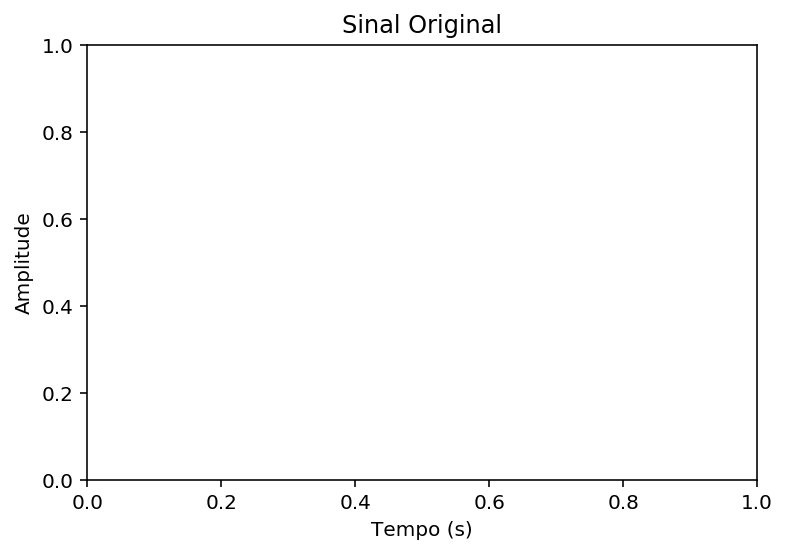

In [0]:
fft_notes(audio)

# 3. Janelamento do sinal de áudio para a aplicação da FFT

Agora, faremos a segmentação do áudio em diversos fragmentos, com poucos milissegundos de duração.

In [0]:
import math

# 5*Fs/1000t = amostras por milissegundo

def janelamento(audio, ms, taxa_sobrepos):
  Fs = len(audio) # numero de amostras
  t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)
  window_length = (1000*len(t))/(Fs*ms)
  
  janelas = []
  
  for index in range(0, int(audio.size - window_length), math.floor(window_length*taxa_sobrepos)):
    janela = []
    for k in range(int(window_length)):
      janela.append(audio[index + k])
    janelas.append(janela)
    
  return janelas

In [0]:
janelas = janelamento(audio, 5, 0.5)

notas = []

for i in janelas:
  notas.append(fft_only_notes(i))
  
print(notas)

In [0]:
def tempos(notas):
  index = 0
  while(index < len(notas)):
    nota = notas[index]
    tempo = 0
    while(nota == notas[index]):
      tempo += 5
      index = index + 1
    print(nota, ": ", tempo, "ms.")
    index = index + 1
      

In [0]:
tempos(notas)

In [0]:
import pywt
import pywt.data

import numpy as np
import matplotlib.pyplot as plt


ecg = pywt.data.ecg()

mode = pywt.Modes.smooth


def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure()
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(audio, 'coif5', "DWT: Signal irregularity")
plot_signal_decomp(audio, 'sym5',
                   "DWT: Frequency and phase change - Symmlets5")
plot_signal_decomp(ecg, 'sym5', "DWT: Ecg sample - Symmlets5")


plt.show()

In [0]:
audio, sr = get_audio()

In [0]:
from matplotlib import pyplot as plt
Pxx, freqs, bins, im = plt.specgram(audio, Fs = sr)
plt.show()

In [0]:
Fs = len(Pxx[12]) # Número de amostras por segundo
t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)

# gerando o eixo das frequências
n = np.size(t)
fr = (Fs/2)*np.linspace(0, 1, n/2)

X_m = (2/n)*np.abs(Pxx[12][0:np.size(fr)]) # normalizando o resultado

peaks = find_peaks(X_m, fr, 0)
peaksInd = find_peaks_Index(X_m, fr, 0)

plt.figure(1)
plt.title("Picos de frequências")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(fr, X_m)
plt.plot(fr[peaksInd], X_m[peaksInd], "x")

In [0]:
def max_filter(line):
  Fs = len(line) # Número de amostras por segundo
  t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)

  # gerando o eixo das frequências
  n = np.size(t)
  fr = (Fs/2)*np.linspace(0, 1, n/2)

  X_m = (2/n)*np.abs(line[0:np.size(fr)]) # normalizando o resultado

  peaksInd = find_peaks_Index(X_m, fr, 0)
  
  return fr, X_m, peaksInd

In [0]:
fr, X_m, peaksInd = max_filter(Pxx[10])

plt.figure(1)
plt.title("Picos de frequências")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(fr, X_m)
plt.plot(fr[peaksInd], X_m[peaksInd], "x")

In [0]:
def find_mins_Index(X_m, fr, min_diff):
  minsInd = []
  avr = max(X_m)/2
  
  for index in range(X_m.size - 2):
    window = [X_m[index], X_m[index+1], X_m[index+2]]
    difference1 = window[1] - window[0]
    difference2 = window[1] - window[2]
    if((difference1 < min_diff and difference2 < min_diff)):
      minsInd.append(index)
      
  return minsInd

def min_filter(line):
  Fs = len(line) # Número de amostras por segundo
  t = np.arange(0, 1, 1/Fs) # eixo do tempo (em segundos)

  # gerando o eixo das frequências
  n = np.size(t)
  fr = (Fs/2)*np.linspace(0, 1, n/2)

  X_m = (2/n)*np.abs(line[0:np.size(fr)]) # normalizando o resultado

  minsInd = find_mins_Index(X_m, fr, 0)
  
  return fr, X_m, minsInd

In [0]:
fr, X_m, minsInd = min_filter(Pxx[10])

plt.figure(1)
plt.title("Mínimos de frequências")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(fr, X_m)
plt.plot(fr[minsInd], X_m[minsInd], "x")

In [0]:
local_maxima = [point for point in peaksInd if point not in minsInd]
plt.figure(1)
plt.title("Máximos locais")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.plot(fr, X_m)
plt.plot(fr[local_maxima], X_m[local_maxima], "x")

In [0]:
!pip install librosa

In [0]:
import librosa

new_audio = []
for i in audio:
  new_audio.append(float(i))
  
stft_audio = np.abs(librosa.stft(np.array(new_audio)))

# stft_audio[f, t] é a magnitude da frequencia f no tempo t

In [0]:
from librosa import display

display.specshow(librosa.amplitude_to_db(stft_audio, ref=np.max), y_axis='log', x_axis='time')

plt.title('Espectrograma de Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [0]:
def find_spec_peaks(audio):
  new_audio = []
  for i in audio:
    new_audio.append(float(i))
  
  stft_audio = np.abs(librosa.stft(np.array(new_audio)))
  
  return librosa.util.localmax(stft_audio)

In [0]:
!pip install aubio

In [0]:
audio, sr = get_audio()

In [0]:
from google.colab import files
files.download()

TypeError: ignored

In [1]:
!pip install python-rtmidi